### Campus Recruitment

Here is a dataset on campus placements. There is a total of 215 student records with information about each student of their SSC board and scores, HSC board, specialization and scores, degree, MBA etc. Our objective is to predict if, given the select information about a student, should that student be Placed or Unplaced. Also, what is the salary that is to be offered to that student.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency

### Loaded the data into pandas dataframe and view the details

In [2]:
df_college = pd.read_csv('Campusplacement.csv')

In [3]:
df_college.shape

(215, 14)

In [4]:
print("The number of rows are", df_college.shape[0], "\n and number of columns are", df_college.shape[1])

The number of rows are 215 
 and number of columns are 14


### Datatype of the fields in the data

In [5]:
df_college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


Observations:

We have 8 fields with 'object' datatype, 6 fields with 'float64' datatype

In [6]:
df_college.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

Observations: We have 215 candidate details and there are mixed datatypes in each column. We have missing values in the salary column since those are the people who didn't get hired.

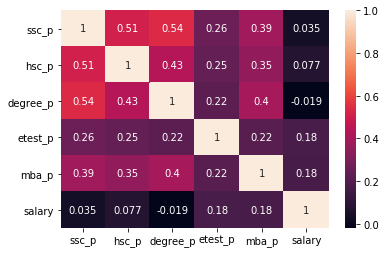

In [7]:
sns.heatmap(df_college.corr(),annot=True)

### First 5 rows of the dataset

In [8]:
df_college.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


### Last 5 rows of the dataset

In [9]:
df_college.tail()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


### Summary of Data

In [10]:
df_college.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [11]:
df_college.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [12]:
df_college.isna()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,False,False,False,False,False,False,False,False,False,False,False,False,False,False
211,False,False,False,False,False,False,False,False,False,False,False,False,False,False
212,False,False,False,False,False,False,False,False,False,False,False,False,False,False
213,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df_college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


In [14]:
catagorical = []
numerical = []
for i in df_college.columns:
    if df_college[i].dtypes=='O':
            catagorical.append(i)
    else:
        numerical.append(i)
print('The numerical columns are',numerical)
print('The catagorical columns are',catagorical)

The numerical columns are ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']
The catagorical columns are ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']


#### Status

In [15]:
df_college.status

0          Placed
1          Placed
2          Placed
3      Not Placed
4          Placed
          ...    
210        Placed
211        Placed
212        Placed
213        Placed
214    Not Placed
Name: status, Length: 215, dtype: object

In [16]:
status = df_college.status.unique()
status
#len(status)

array(['Placed', 'Not Placed'], dtype=object)

In [17]:
df_college['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

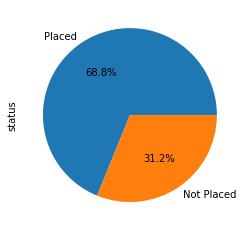

In [18]:
#sns.countplot(df_college['status'])
df_college['status'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%')

Observation: From 215 candidates, 148 students got placed while 67 students are not placed.

In [19]:
df_college.groupby(['gender'])['status'].value_counts()

gender  status    
F       Placed         48
        Not Placed     28
M       Placed        100
        Not Placed     39
Name: status, dtype: int64

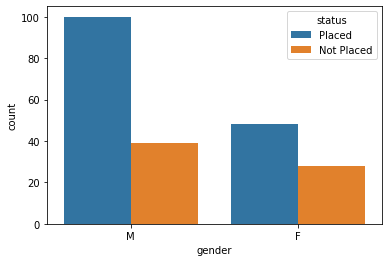

In [20]:
sns.countplot(df_college['gender'],hue=df_college['status'])
plt.show()
#df_college['gender'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%')

Observation : 
1. 64.7% of males and 35.3% females got placed. Males have more chance to get placed.
2. Many candidates who got placed received package between 2L-3.5L PA
3. Only one candidate got around 10L PA

What is the probability that a randomly selected candidate will be male?

In [21]:
print('Probability that a randomly selected candidate will be male:', 139/len(df_college['gender']))

Probability that a randomly selected candidate will be male: 0.6465116279069767


What is the probability that a randomly selected candidate will be female?

In [22]:
print('Probability that a randomly selected candidate will be female:', 76/len(df_college['gender']))

Probability that a randomly selected candidate will be female: 0.35348837209302325


In [23]:
df_college.groupby(['degree_t'])['status'].value_counts()

degree_t   status    
Comm&Mgmt  Placed        102
           Not Placed     43
Others     Not Placed      6
           Placed          5
Sci&Tech   Placed         41
           Not Placed     18
Name: status, dtype: int64

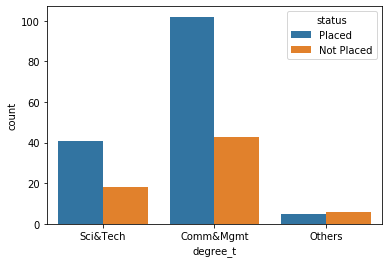

In [24]:
sns.countplot(x=df_college['degree_t'],hue=df_college['status'])
plt.show()
#df_college['degree_t'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%')

Observation:
About 67.4% students got placed from commerce & management, 27.4% students got placed from science & technology stream and 5.1% students got placed from Others respectively. Students from these two streams got placed than others.

In [25]:
df_college.groupby(['workex'])['status'].value_counts()

workex  status    
No      Placed        84
        Not Placed    57
Yes     Placed        64
        Not Placed    10
Name: status, dtype: int64

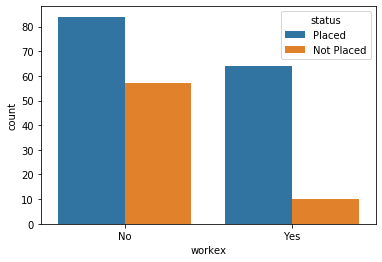

In [26]:
sns.countplot(x=df_college['workex'],hue=df_college['status'])

Observation: 86.48% of students who have work experience got hired while only 59.57% of students with no work experience got hired. Hence work experience influence the hiring process.

In [27]:
df_college.groupby(['specialisation'])['status'].value_counts()

specialisation  status    
Mkt&Fin         Placed        95
                Not Placed    25
Mkt&HR          Placed        53
                Not Placed    42
Name: status, dtype: int64

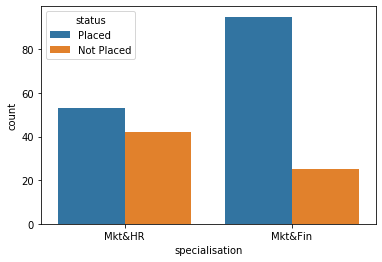

In [28]:
sns.countplot(x=df_college['specialisation'],hue=df_college['status'])
plt.show()
#df_college['specialisation'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%')

In [29]:
print('Probability of being Specialisation as Mkt&Fin:', 120/215, 'and Probability of being Specialisation as Mkt&HR:', 95/215)

Probability of being Specialisation as Mkt&Fin: 0.5581395348837209 and Probability of being Specialisation as Mkt&HR: 0.4418604651162791


Observation:
1. About 55.8% from market & finance and 44.2% of students got placed from market & HR streams respectively. From this we can conclude that students who have market & finance as their specialisation have more chance to be placed.
2. Marketing and Finance Specialization is Most Demanded by Corporate.

In [30]:
df_college['ssc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [31]:
df_college.groupby(['ssc_b'])['status'].value_counts()

ssc_b    status    
Central  Placed        78
         Not Placed    38
Others   Placed        70
         Not Placed    29
Name: status, dtype: int64

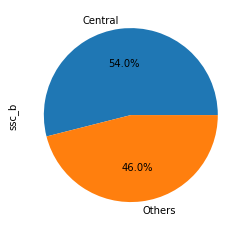

In [32]:
df_college['ssc_b'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%')

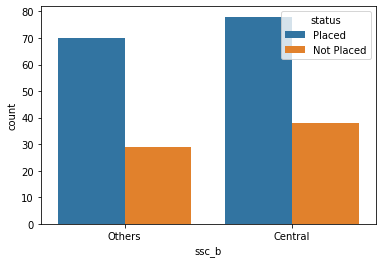

In [33]:
sns.countplot(x=df_college['ssc_b'],hue=df_college['status'])
plt.show()

Observation : 
- About 54% from Central and 46% of students got placed from Others board respectively. From this we can conclude that students who have Central board in SSC as their have more chance to be placed.

In [34]:
df_college.groupby(['hsc_b'])['status'].value_counts()

hsc_b    status    
Central  Placed        57
         Not Placed    27
Others   Placed        91
         Not Placed    40
Name: status, dtype: int64

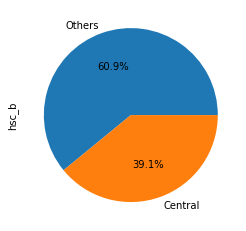

In [35]:
df_college['hsc_b'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%')

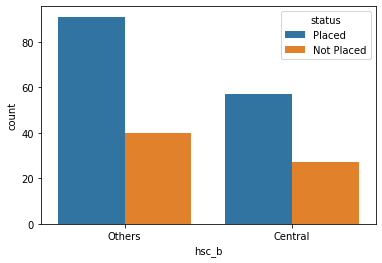

In [36]:
sns.countplot(x=df_college['hsc_b'],hue=df_college['status'])
plt.show()

Oservation : About 60.9% from Others and 39.1% of students got placed from Central board respectively. From this we can conclude that students who have Others board in HSC as their have more chance to be placed.

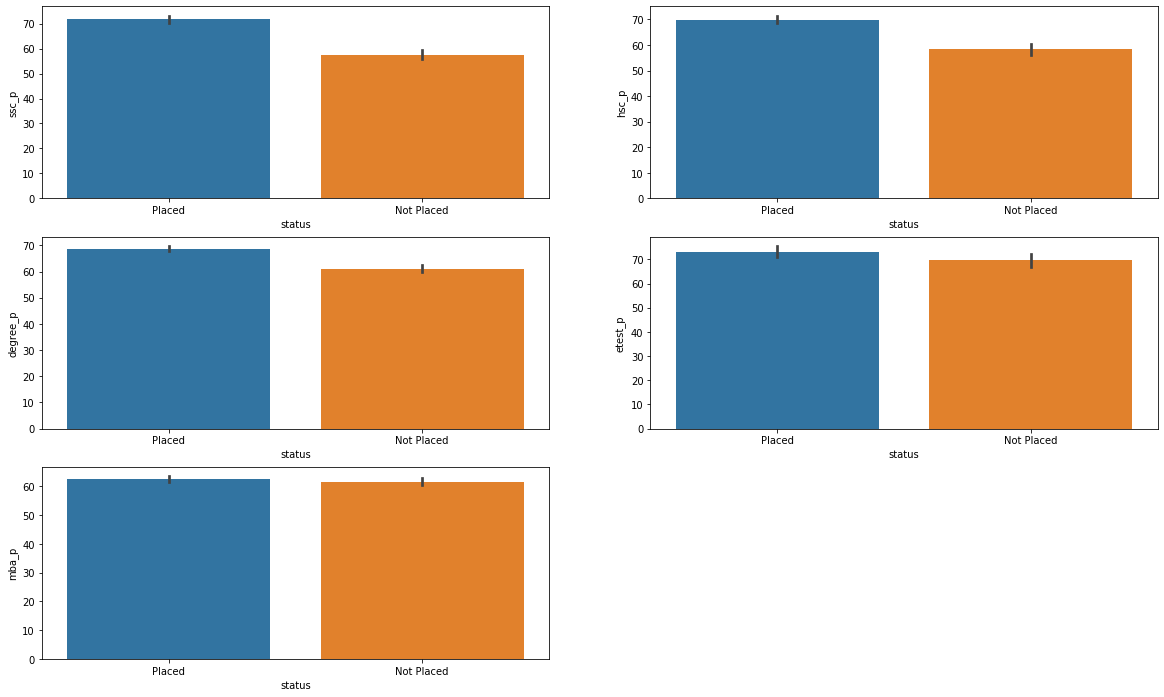

In [37]:
fig,axes = plt.subplots(3,2, figsize=(20,12))
sns.barplot(x='status', y='ssc_p', data=df_college, ax=axes[0][0])
sns.barplot(x='status', y='hsc_p', data=df_college, ax=axes[0][1])
sns.barplot(x='status', y='degree_p',data=df_college, ax=axes[1][0])
sns.barplot(x='status', y='etest_p',data=df_college, ax=axes[1][1])
sns.barplot(x='status', y='mba_p', data=df_college, ax=axes[2][0])
fig.delaxes(ax = axes[2][1]) 

Observation : 
1. The students who have scored less than 60 percent in 10th or 12th or degree are mostly not getting placed. So Yes, Percentage matter for placement.
2. But, Higher Percentage necessarily doesn't guarantee a Placement.
3. Etest and MBA percentage doesn't matter.

In [38]:
df_college[(df_college['status']=='Not Placed') & (df_college['ssc_p']>=61) & (df_college['hsc_p']>=61) 
                         & (df_college['degree_p']>=61) & (df_college['mba_p']>=61)].sort_values(by='etest_p', ascending = False)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
97,F,70.50,Central,62.50,Others,Commerce,61.0,Comm&Mgmt,No,93.91,Mkt&Fin,69.03,Not Placed,NaN
198,F,67.00,Central,70.00,Central,Commerce,65.0,Others,No,88.00,Mkt&HR,71.96,Not Placed,NaN
165,F,63.30,Central,78.33,Others,Commerce,74.0,Comm&Mgmt,No,80.00,Mkt&Fin,74.56,Not Placed,NaN
179,F,77.80,Central,64.00,Central,Science,64.2,Sci&Tech,No,75.50,Mkt&HR,72.14,Not Placed,NaN
79,F,69.00,Central,62.00,Central,Science,66.0,Sci&Tech,No,75.00,Mkt&HR,67.99,Not Placed,NaN
18,F,63.00,Central,66.00,Central,Commerce,64.0,Comm&Mgmt,No,68.00,Mkt&HR,64.08,Not Placed,NaN
46,F,70.89,Others,71.98,Others,Science,65.6,Comm&Mgmt,No,68.00,Mkt&HR,71.63,Not Placed,NaN
41,F,74.00,Others,63.16,Others,Commerce,65.0,Comm&Mgmt,Yes,65.00,Mkt&HR,69.76,Not Placed,NaN
158,M,67.00,Others,63.00,Others,Science,64.0,Sci&Tech,No,60.00,Mkt&Fin,61.87,Not Placed,NaN
167,M,67.90,Others,62.00,Others,Science,67.0,Sci&Tech,Yes,58.10,Mkt&Fin,75.71,Not Placed,NaN


Observation: This students are good in there studies & under ceritire but Not Placed. 


In [39]:
df_college[(df_college.workex == 'Yes') & (df_college.status == 'Not Placed')].count()[0]

10

Observation : 10 students with work experieance were not placed

In [40]:
resultwise = df_college.loc[(df_college['status']=='Not Placed') & (df_college['ssc_p']<=60) & (df_college['hsc_p']<=60) & (df_college['degree_p']<=60) & (df_college['mba_p']<=60)].sort_values(by='etest_p', ascending = False)
resultwise.drop(['gender','ssc_b','hsc_b','salary','hsc_s','degree_t','specialisation'],axis='columns')

,ssc_p,hsc_p,degree_p,workex,etest_p,mba_p,status
206,41.0,42.0,60.0,No,97.00,53.39,Not Placed
65,54.0,47.0,57.0,No,89.69,57.10,Not Placed
87,59.6,51.0,60.0,No,75.00,59.08,Not Placed
120,58.0,40.0,59.0,No,73.00,58.81,Not Placed
173,52.0,52.0,55.0,No,67.00,59.32,Not Placed
3,56.0,52.0,52.0,No,66.00,59.43,Not Placed
49,50.0,37.0,52.0,No,65.00,56.11,Not Placed
149,44.0,58.0,55.0,Yes,64.25,58.54,Not Placed
36,51.0,44.0,57.0,No,64.00,51.45,Not Placed
168,48.0,51.0,58.0,Yes,60.00,58.79,Not Placed


Observation: As per this details we can say that this students are not under criteria of hiring process. Heance under criteria of hiring process have more chance to be placed.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002465C7B4C48>,
      dtype=object)

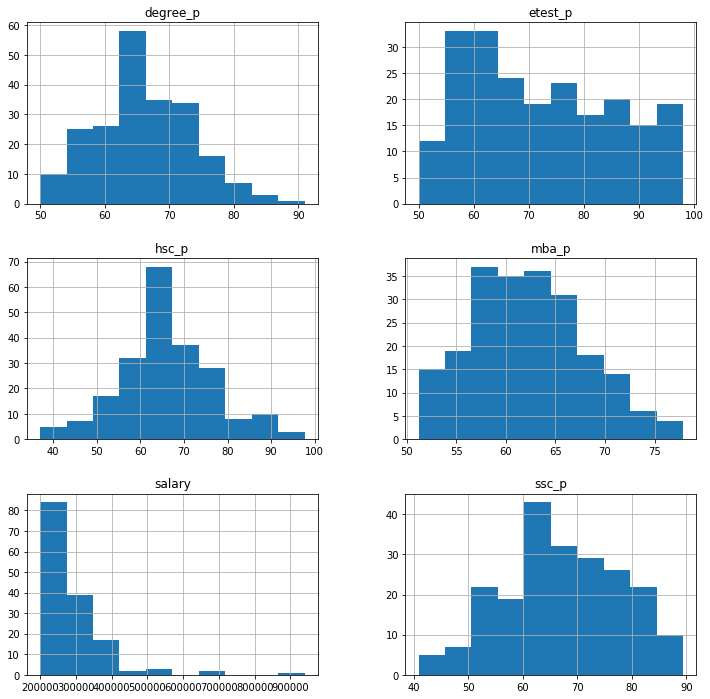

In [41]:
df_college[numerical].hist(figsize = (12, 12))

In [42]:
#sns.pairplot(data=df_college,palette="Blues_d")

So, who are the students who are more likely to get placed?
1. Class 10 and class 12 percentage should be greater than 60% from any board
2. You should have opted for commerce in HSC (science will also work)
3. Degree from Commerce and managemnet will help you (Science and Tech will also work)
4. Having work experience is like strawberry on cake. Students having work experience are more likley to get placed

1. Find the conditional probability of different education level among the male candidates.

2. Find the conditional probability of different education level among the female candidates.

In [43]:
#pd.crosstab(df_college['gender'], df_college['ssc_b'])
#pd.crosstab(df_college['gender'], df_college['hsc_b'])
#pd.crosstab(df_college['gender'], df_college['hsc_s'])
#pd.crosstab(df_college['gender'], df_college['degree_t'])
#pd.crosstab(df_college['gender'], df_college['specialisation'])
#pd.crosstab(df_college['gender'], df_college['workex'])
#pd.crosstab(df_college['gender'], df_college['status'])

In [44]:
#print('Among MALE candidates:')
#print('Probability of SSC Central board:', 74/139, 'and Probability of SSC Others board:', 65/139)
#print('Probability of HSC Central board:', 51/139, 'and Probability of HSC Others board:', 88/139)
#print('Probability of being HSC stream as Arts:', 5/139, ', Probability of being HSC stream as Commerce:', 73/139, 'and Probability of being HSC stream as Science:', 61/139)
#print('Probability of being Degree as Comm&Mgmt:', 92/139, ', Probability of being Degree as Others:', 5/139, 'and Probability of being Degree as Sci&Tech:', 42/139)
#print('Probability of being Specialisation as Mkt&Fin:', 83/139, 'and Probability of being Specialisation as Mkt&HR:', 56/139)
#print('Probability of having Work experieance:', 52/139, 'and Probability of No Work experieance:', 87/139)
#print('Probability of being placed:', 100/139, 'and Probability of being not placed:', 39/139)
#print()
#print('Among FEMALE candidates:')
#print('Probability of SSC Central board:', 42/76, 'and Probability of SSC Others board:', 34/76)
#print('Probability of HSC Central board:', 33/76, 'and Probability of HSC Others board:', 43/76)
#print('Probability of being HSC stream as Arts:', 6/76, ', Probability of being HSC stream as Commerce:', 40/76, 'and Probability of being HSC stream as Science:', 30/76)
#print('Probability of being Degree as Comm&Mgmt:', 53/76, ', Probability of being Degree as Others:', 6/76, 'and Probability of being Degree as Sci&Tech:', 17/76)
#print('Probability of being Specialisation as Mkt&Fin:', 37/76, 'and Probability of being Specialisation as Mkt&HR:', 39/76)
#print('Probability of having Work experieance:', 22/76, 'and Probability of No Work experieance:', 54/76)
#print('Probability of being placed:', 48/76, 'and Probability of being not placed:', 28/76)

### P - Values

In [45]:
Status = pd.crosstab(df_college['gender'], df_college['status'])
Status

status,Not Placed,Placed
gender,,
F,28,48
M,39,100


In [46]:
chi2, pval, dof, exp_freq = chi2_contingency(Status, correction = False)
pval

0.18368669001622365

In [47]:
SSC = pd.crosstab(df_college['gender'], df_college['ssc_b'])
SSC

ssc_b,Central,Others
gender,,
F,42,34
M,74,65


In [48]:
chi2, pval, dof, exp_freq = chi2_contingency(SSC, correction = False)

In [49]:
pval

0.7757309254370297

In [50]:
HSC = pd.crosstab(df_college['gender'], df_college['hsc_b'])
HSC

hsc_b,Central,Others
gender,,
F,33,43
M,51,88


In [51]:
chi2, pval, dof, exp_freq = chi2_contingency(HSC, correction = False)

In [52]:
pval

0.33357423231086947

In [53]:
HSC_Stream = pd.crosstab(df_college['gender'], df_college['hsc_s'])
HSC_Stream

hsc_s,Arts,Commerce,Science
gender,,,
F,6,40,30
M,5,73,61


In [54]:
chi2, pval, dof, exp_freq = chi2_contingency(HSC_Stream, correction = False)

In [55]:
pval

0.3679243286067856

In [56]:
Degree = pd.crosstab(df_college['gender'], df_college['degree_t'])
Degree

degree_t,Comm&Mgmt,Others,Sci&Tech
gender,,,
F,53,6,17
M,92,5,42


In [57]:
chi2, pval, dof, exp_freq = chi2_contingency(Degree, correction = False)

In [58]:
pval

0.22670914403139364

In [59]:
Specialisation = pd.crosstab(df_college['gender'], df_college['specialisation'])
Specialisation

specialisation,Mkt&Fin,Mkt&HR
gender,,
F,37,39
M,83,56


In [60]:
chi2, pval, dof, exp_freq = chi2_contingency(Specialisation, correction = False)

In [61]:
pval

0.11956420037824636

In [62]:
WorkExp = pd.crosstab(df_college['gender'], df_college['workex'])
WorkExp

workex,No,Yes
gender,,
F,54,22
M,87,52


In [63]:
chi2, pval, dof, exp_freq = chi2_contingency(WorkExp, correction = False)

In [64]:
pval

0.21181792924444207

In [65]:
SSC = pd.crosstab(df_college['status'], df_college['ssc_b'])
SSC

ssc_b,Central,Others
status,,
Not Placed,38,29
Placed,78,70


In [66]:
chi2, pval, dof, exp_freq = chi2_contingency(SSC, correction = False)

In [67]:
pval

0.584465148011595

SSC board does not have an impact on placement.

In [68]:
HSC = pd.crosstab(df_college['status'], df_college['hsc_b'])
HSC

hsc_b,Central,Others
status,,
Not Placed,27,40
Placed,57,91


In [69]:
chi2, pval, dof, exp_freq = chi2_contingency(HSC, correction = False)

In [70]:
pval

0.8037818499464535

HSC board does not have an impact on placement.

In [71]:
HSC_Stream = pd.crosstab(df_college['status'], df_college['hsc_s'])
HSC_Stream

hsc_s,Arts,Commerce,Science
status,,,
Not Placed,5,34,28
Placed,6,79,63


In [72]:
chi2, pval, dof, exp_freq = chi2_contingency(HSC_Stream, correction = False)

In [73]:
pval

0.5727118511343621

HSC Stream does not have an impact on placement.

In [74]:
Degree = pd.crosstab(df_college['status'], df_college['degree_t'])
Degree

degree_t,Comm&Mgmt,Others,Sci&Tech
status,,,
Not Placed,43,6,18
Placed,102,5,41


In [75]:
chi2, pval, dof, exp_freq = chi2_contingency(Degree, correction = False)

In [76]:
pval

0.22661076190356658

Degree specialisation does not have an impact on placement..

In [77]:
Specialisation = pd.crosstab(df_college['status'], df_college['specialisation'])
Specialisation

specialisation,Mkt&Fin,Mkt&HR
status,,
Not Placed,25,42
Placed,95,53


In [78]:
chi2, pval, dof, exp_freq = chi2_contingency(Specialisation, correction = False)

In [79]:
pval

0.00023754674658192735

Students with Mkt&Fin have a higher probability for placements compared to Mkt&HR

In [80]:
WorkExp = pd.crosstab(df_college['status'], df_college['workex'])
WorkExp

workex,No,Yes
status,,
Not Placed,57,10
Placed,84,64


In [81]:
chi2, pval, dof, exp_freq = chi2_contingency(WorkExp, correction = False)

In [82]:
pval

5.169385992244802e-05

Prior work experience has no effect on placements.

In [83]:
#df_college.groupby(['gender'])['status'].value_counts()

Find the probability that a randomly selected candidate is a male and is placed.

In [84]:
print("probability that a randomly selected candidate is a male and is placed :", (100/148) * (148/215)) #P(Placed Male) = P (Placed | Male) x P (Male) =

probability that a randomly selected candidate is a male and is placed : 0.46511627906976744


Find the probability that a randomly selected candidate is a female and is placed.

In [85]:
print("probability that a randomly selected candidate is a female and is placed :", (48/148) * (148/215)) #P(Placed female) = P (Placed | Female) x P (Female) =

probability that a randomly selected candidate is a female and is placed : 0.2232558139534884


#### Gender

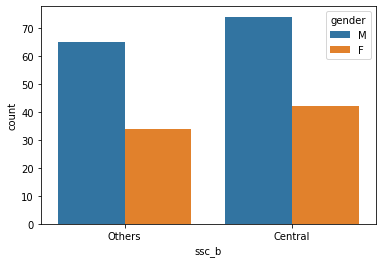

In [86]:
sns.countplot(x=df_college['ssc_b'],hue=df_college['gender'])
plt.show()

Maximum students are male from Central SSC, followed by Male in others.

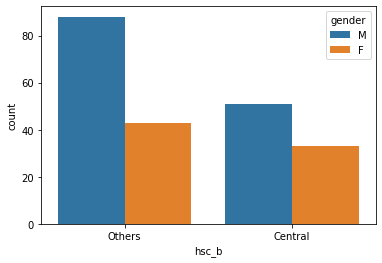

In [87]:
sns.countplot(x=df_college['hsc_b'],hue=df_college['gender'])
plt.show()

In HSC, maximum students are male in HSC Others board followed by Central.

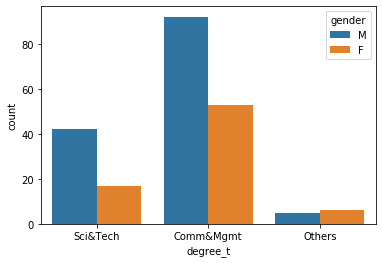

In [88]:
sns.countplot(x=df_college['degree_t'],hue=df_college['gender'])
plt.show()

Maximum students are in Comm&Mgmt both male and female, followed by Sci&Tech

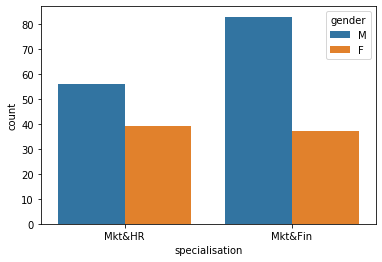

In [89]:
sns.countplot(x=df_college['specialisation'],hue=df_college['gender'])
plt.show()

Male students are mostly focused in Mtk&Fin whereas female students has an almost equal distribution in Mkt&HR and Mkt&Fin

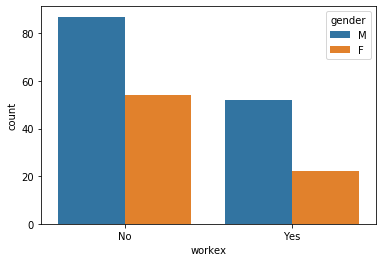

In [90]:
sns.countplot(x=df_college['workex'],hue=df_college['gender'])
plt.show()

Majority of both male and female students donot have any prior work experience

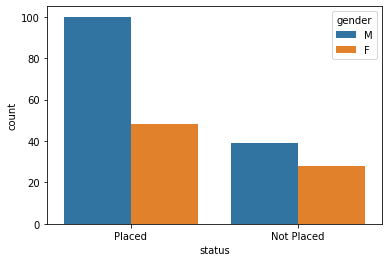

In [91]:
sns.countplot(x=df_college['status'],hue=df_college['gender'])
plt.show()

The ratio of placed:unplaced students is greater for male students against female students.

In [92]:
df_college.groupby(['gender'])['ssc_p'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,76.0,68.310921,11.522542,40.89,62.5,69.75,77.0,88.0
M,139.0,66.752518,10.429150,41.00,60.2,65.00,74.0,89.4


Female students have overall scored better than male students in ssc, however the highest is scored by a male student.

In [93]:
df_college.groupby(['gender'])['hsc_p'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,76.0,66.646842,11.021048,37.0,60.0,64.6,73.0,97.0
M,139.0,66.161655,10.865579,39.0,61.0,65.0,73.0,97.7


In HSC, male students have scored better than female students by a negligable margin.

In [94]:
df_college.groupby(['gender'])['degree_p'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,76.0,68.090000,8.128285,50.2,64.00,67.7,73.0,91.0
M,139.0,65.429856,6.748840,50.0,60.45,65.0,70.1,83.0


Female students have overall scored better than male students in Degree.

In [95]:
df_college.groupby(['gender'])['etest_p'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,76.0,70.590658,13.343943,50.0,58.765,69.0,80.000,98.0
M,139.0,72.926115,13.213727,50.0,61.140,72.0,84.135,97.4


Male students have overall scored better than female students in employablity test.

In [96]:
df_college.groupby(['gender'])['mba_p'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,76.0,64.643553,5.242545,53.29,60.710,64.805,68.675,76.18
M,139.0,60.984892,5.750263,51.21,56.875,60.440,64.245,77.89


Female students have overall scored better than male students in MBA.

In [97]:
df_college.groupby(['gender'])['salary'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,48.0,267291.666667,75948.178955,200000.0,219500.0,250000.0,300000.0,650000.0
M,100.0,298910.000000,99514.792058,200000.0,250000.0,270000.0,300000.0,940000.0


Male students who got placed have a higher average salary compared to female students. The highest salary is offered to a male student.

#### Salary

In [98]:
df_college['salary'].count()

148

In [99]:
df_college['salary'].max()

940000.0

In [100]:
df_college['salary'].min()

200000.0

In [101]:
df_college['salary'].mean()

288655.4054054054

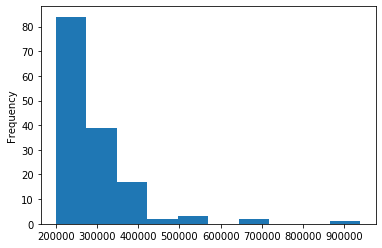

In [102]:
df_college['salary'].plot.hist()

In [103]:
df_college[df_college['status']=='Placed']['salary'].describe()


count       148.000000
mean     288655.405405
std       93457.452420
min      200000.000000
25%      240000.000000
50%      265000.000000
75%      300000.000000
max      940000.000000
Name: salary, dtype: float64

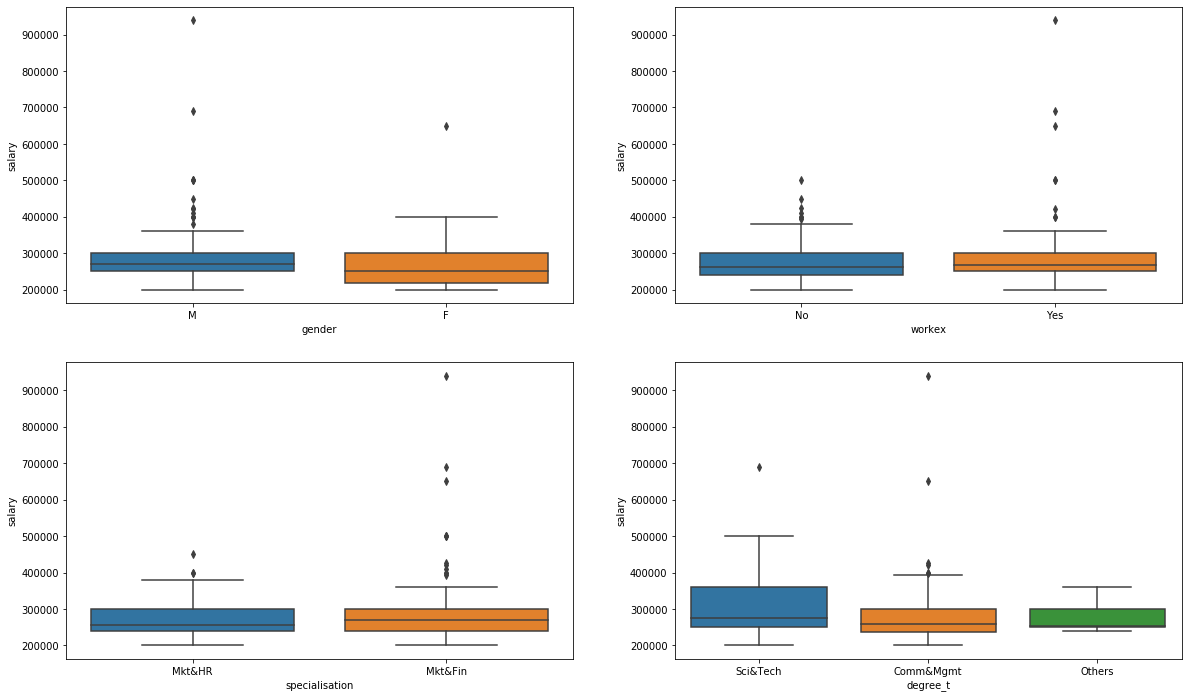

In [104]:
fig,axes = plt.subplots(2,2, figsize=(20,12))
sns.boxplot(x='gender', y='salary', data=df_college, ax=axes[0][0])
sns.boxplot(x='workex', y='salary', data=df_college, ax=axes[0][1])
sns.boxplot(x='specialisation', y='salary',data=df_college, ax=axes[1][0])
sns.boxplot(x='degree_t', y='salary',data=df_college, ax=axes[1][1])
 

Observation :

1. The higher salary got by Male student from Comm&Mgmt degree, did Market&Fin specialisation and had pervious work experieance.
2. But maximum students from Comm&Mgmt degree got less salary. Heance Comm&Mgmt degree student getting less salary as compare to Sci&Tech.

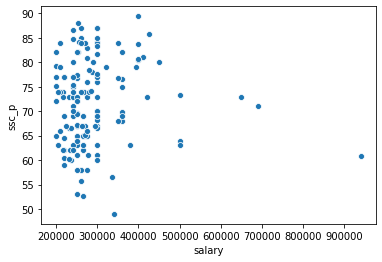

In [105]:
sns.scatterplot(x="salary", y="ssc_p", data=df_college)

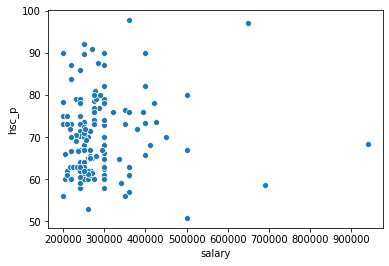

In [106]:
sns.scatterplot(x="salary", y="hsc_p", data=df_college)

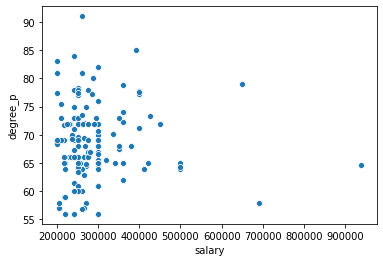

In [107]:
sns.scatterplot(x="salary", y="degree_p", data=df_college)

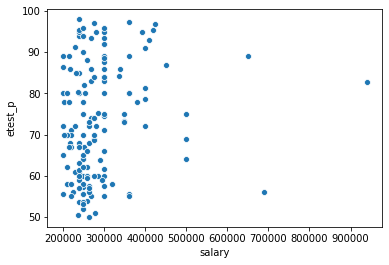

In [108]:
sns.scatterplot(x="salary", y="etest_p", data=df_college)

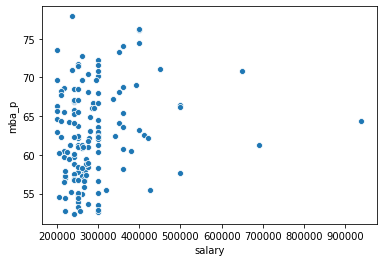

In [109]:
sns.scatterplot(x="salary", y="mba_p", data=df_college)

- SSC% does not affect salary offered to students.
- HSC% does not affect salary offered to students.
- Degree% does not affect salary offered to students.
- etest% does not affect salary offered to students.
- MBA% does not affect salary offered to students

From this we can infer that companies use MBA% and other % only as a cut-off criteria but not a selection criteria for a student.

In [110]:
df_college[(df_college['status'] == 'Placed') & (df_college['ssc_p']>=60) & (df_college['hsc_p']>=60) & (df_college['degree_p']>=60) & (df_college['mba_p']>=60) & (df_college['etest_p']>=60)].sort_values(by='salary', ascending = False).drop(['gender','ssc_b','hsc_b','hsc_s','workex','degree_t','specialisation','status'],axis='columns')


,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
119,60.80,68.40,64.60,82.66,64.34,940000.0
177,73.00,97.00,79.00,89.00,70.81,650000.0
163,63.00,67.00,64.00,75.00,66.46,500000.0
53,80.00,70.00,72.00,87.00,71.04,450000.0
95,73.00,78.00,65.00,95.46,62.16,420000.0
...,...,...,...,...,...,...
15,65.00,75.00,69.00,72.00,64.66,200000.0
44,77.00,73.00,81.00,89.00,69.70,200000.0
107,82.00,90.00,83.00,80.00,73.52,200000.0
50,75.20,73.20,68.40,65.00,62.98,200000.0


In [111]:
ssc_p = pd.crosstab(df_college['ssc_p'], df_college['salary'])
#ssc_p

In [112]:
chi2, pval, dof, exp_freq = chi2_contingency(ssc_p, correction = False)

In [113]:
pval

0.2709316302242513

In [114]:
hsc_p = pd.crosstab(df_college['hsc_p'], df_college['salary'])
#hsc_p

In [115]:
chi2, pval, dof, exp_freq = chi2_contingency(hsc_p, correction = False)

In [116]:
pval

0.10499074437478217

In [117]:
degree_p = pd.crosstab(df_college['degree_p'], df_college['salary'])
#degree_p

In [118]:
chi2, pval, dof, exp_freq = chi2_contingency(degree_p, correction = False)

In [119]:
pval

0.4490445732360614

In [120]:
etest_p = pd.crosstab(df_college['etest_p'], df_college['salary'])
#etest_p

In [121]:
chi2, pval, dof, exp_freq = chi2_contingency(etest_p, correction = False)

In [122]:
pval

0.0074159276845318185

In [123]:
print('Probability of being Specialisation as Mkt&Fin:', 45/79)

Probability of being Specialisation as Mkt&Fin: 0.569620253164557


In [124]:
mba_p = pd.crosstab(df_college['mba_p'], df_college['salary'])
#mba_p

In [125]:
chi2, pval, dof, exp_freq = chi2_contingency(mba_p, correction = False)

In [126]:
pval

0.3781253635659441

### Details of students who got salaries greater than 300000

In [127]:
df_college[(df_college['salary'] > 300000)].sort_values(by='salary', ascending = True)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
37,F,79.00,Central,76.00,Central,Science,65.60,Sci&Tech,No,58.00,Mkt&HR,55.47,Placed,320000.0
74,M,56.60,Central,64.80,Central,Commerce,70.20,Comm&Mgmt,No,84.27,Mkt&Fin,67.20,Placed,336000.0
153,M,49.00,Others,59.00,Others,Science,65.00,Sci&Tech,Yes,86.00,Mkt&Fin,62.48,Placed,340000.0
28,M,76.76,Others,76.50,Others,Commerce,67.50,Comm&Mgmt,Yes,73.35,Mkt&Fin,64.15,Placed,350000.0
125,F,84.00,Central,73.00,Central,Commerce,73.00,Comm&Mgmt,No,75.00,Mkt&Fin,73.33,Placed,350000.0
178,M,68.00,Others,56.00,Others,Science,68.00,Sci&Tech,No,73.00,Mkt&HR,68.07,Placed,350000.0
70,M,82.00,Others,61.00,Others,Science,62.00,Sci&Tech,No,89.00,Mkt&Fin,65.45,Placed,360000.0
22,F,69.80,Others,60.80,Others,Science,72.23,Sci&Tech,No,55.53,Mkt&HR,68.81,Placed,360000.0
24,M,76.50,Others,97.70,Others,Science,78.86,Sci&Tech,No,97.40,Mkt&Fin,74.01,Placed,360000.0
131,F,74.90,Others,57.00,Others,Science,62.00,Others,Yes,80.00,Mkt&Fin,60.78,Placed,360000.0


### Details of students who got salaries less that 300000

In [128]:
df_college[(df_college['salary'] < 300000)].sort_values(by='salary', ascending = True)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
50,F,75.20,Central,73.20,Central,Science,68.40,Comm&Mgmt,No,65.00,Mkt&HR,62.98,Placed,200000.0
135,F,72.00,Central,56.00,Others,Science,69.00,Comm&Mgmt,No,55.60,Mkt&HR,65.63,Placed,200000.0
44,F,77.00,Others,73.00,Others,Commerce,81.00,Comm&Mgmt,Yes,89.00,Mkt&Fin,69.70,Placed,200000.0
15,F,65.00,Central,75.00,Central,Commerce,69.00,Comm&Mgmt,Yes,72.00,Mkt&Fin,64.66,Placed,200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,M,78.50,Central,65.50,Central,Science,67.00,Sci&Tech,Yes,95.00,Mkt&Fin,64.86,Placed,280000.0
162,M,74.20,Central,87.60,Others,Commerce,77.25,Comm&Mgmt,Yes,75.20,Mkt&Fin,66.06,Placed,285000.0
40,F,78.00,Central,77.00,Others,Commerce,80.00,Comm&Mgmt,No,60.00,Mkt&Fin,66.72,Placed,287000.0
171,M,80.00,Others,80.00,Others,Commerce,72.00,Comm&Mgmt,Yes,63.79,Mkt&Fin,66.04,Placed,290000.0


#### Which Gender have the highst average salary?

In [129]:
df_college.groupby('gender').mean()['salary']

gender
F    267291.666667
M    298910.000000
Name: salary, dtype: float64

Observation : Male student got highest average salary of 29.8 compare to females.

#### Which SSC Board have the highst average salary ?

In [130]:
df_college.groupby('ssc_b').mean()['salary']

ssc_b
Central    288166.666667
Others     289200.000000
Name: salary, dtype: float64

Observation :

1. Others board students got highst average salary of 289543.859649 compare to Central board.
2. Slightly diffreance in Central board salary. Heance HSC board should not affect on salary.

#### Which HSC Board have the highst average salary ?

In [131]:
df_college.groupby('hsc_b').mean()['salary']

hsc_b
Central    289543.859649
Others     288098.901099
Name: salary, dtype: float64

Observation :

1. Central board students got highst average salary of 289543.859649 comapre to Others board.
2. Slightly diffreance in Others board salary. Heance HSC board should not affect on salary.

#### Which HSC Stream have the highst average salary ?

In [132]:
df_college.groupby('hsc_s').mean()['salary']

hsc_s
Arts        248666.666667
Commerce    287417.721519
Science     294015.873016
Name: salary, dtype: float64

Observation : Science streem student got highst average salary of 294015.873016

#### Which Degree have the highst average salary ?

In [133]:
df_college.groupby('degree_t').mean()['salary']

degree_t
Comm&Mgmt    278627.450980
Others       280400.000000
Sci&Tech     314609.756098
Name: salary, dtype: float64

Observation : Sci&Tech degree student got highst average salary of 314609.756098

#### Which Specialisation have the highst average salary ?

In [134]:
df_college.groupby('specialisation').mean()['salary']

specialisation
Mkt&Fin    298852.631579
Mkt&HR     270377.358491
Name: salary, dtype: float64

Observation : Market & finance student got highst average salary of 298852.631579

#### Top 10 Students list As per there Salary

In [135]:
Top10 = df_college[df_college['status']=='Placed'].sort_values(by='salary', ascending = False).head(10)
Top10

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
119,M,60.80,Central,68.40,Central,Commerce,64.60,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
150,M,71.00,Central,58.66,Central,Science,58.00,Sci&Tech,Yes,56.00,Mkt&Fin,61.30,Placed,690000.0
177,F,73.00,Central,97.00,Others,Commerce,79.00,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0
163,M,63.00,Others,67.00,Others,Science,64.00,Sci&Tech,No,75.00,Mkt&Fin,66.46,Placed,500000.0
77,M,64.00,Others,80.00,Others,Science,65.00,Sci&Tech,Yes,69.00,Mkt&Fin,57.65,Placed,500000.0
174,M,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.00,Mkt&Fin,66.23,Placed,500000.0
53,M,80.00,Others,70.00,Others,Science,72.00,Sci&Tech,No,87.00,Mkt&HR,71.04,Placed,450000.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
95,M,73.00,Central,78.00,Others,Commerce,65.00,Comm&Mgmt,Yes,95.46,Mkt&Fin,62.16,Placed,420000.0
39,M,81.00,Others,68.00,Others,Science,64.00,Sci&Tech,No,93.00,Mkt&Fin,62.56,Placed,411000.0


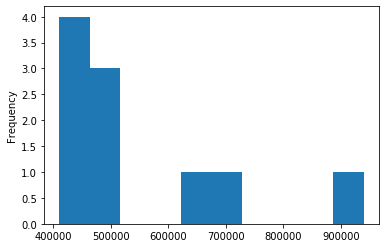

In [136]:
Top10['salary'].plot.hist()

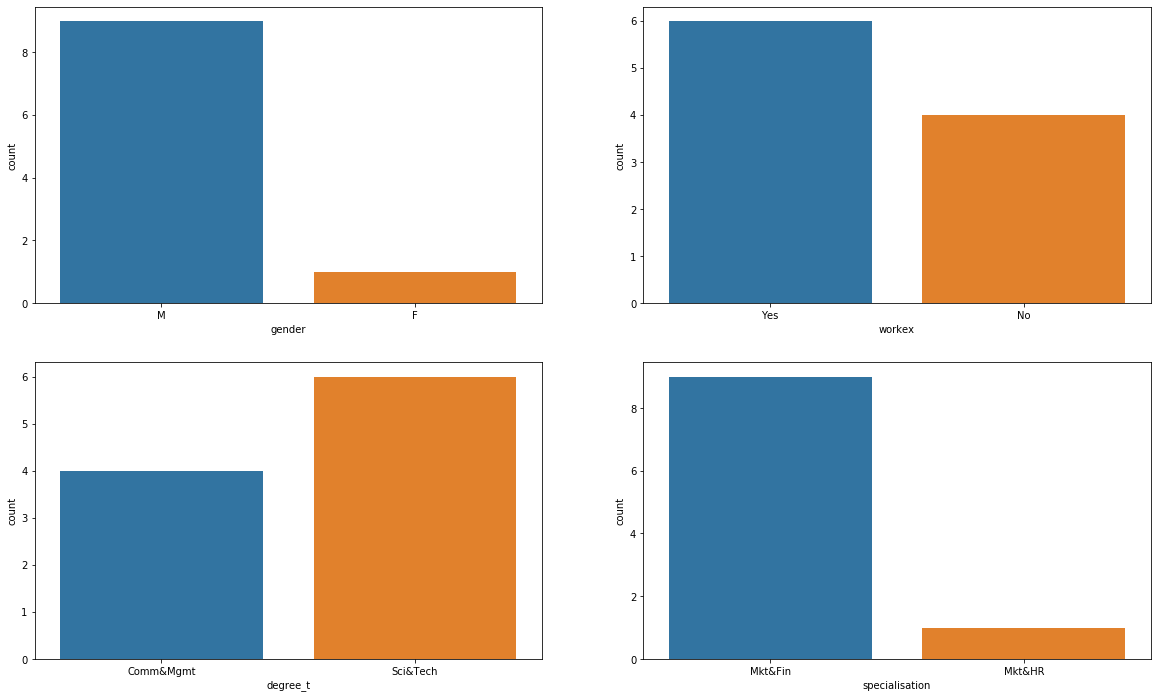

In [137]:
fig,axes = plt.subplots(2,2, figsize=(20,12))
sns.countplot(x=Top10['gender'], ax=axes[0][0])
sns.countplot(x=Top10['workex'], ax=axes[0][1])
sns.countplot(x=Top10['degree_t'], ax=axes[1][0])
sns.countplot(x=Top10['specialisation'], ax=axes[1][1])
 

The mean salaries of Comm&Mgmt Degree in Mkt&Fin, is calculated to be 28,000 with a standard deviation of 90,000. The random variable salary of Comm&Mgmt Degree follows a normal distribution.

- What is the probability that a Comm&Mgmt Degree in Mkt&Fin has a salary more than 3,00,000 ?
- What is the probability that a Comm&Mgmt Degree in Mkt&Fin has a salary between 3,00,000 & 7,00,000 ?
- What is the probability that a Comm&Mgmt Degree in Mkt&Fin has a salary less than 3,00,000 ?

In [138]:
CommMgmt = (300000 - 280000) / 940000
CommMgmt

0.02127659574468085

In [139]:
1 - stats.norm.cdf(0.021)

0.49162282783824884

In [140]:
z1 = (300000 - 280000) / 940000
z2 = (700000 - 280000) / 940000

In [141]:
z1, z2

(0.02127659574468085, 0.44680851063829785)

In [142]:
stats.norm.cdf(z2) - stats.norm.cdf(z1)

0.16400584381633843

In [143]:
#df_college[(df_college['salary'] > 300000) & (df_college['salary'] < 700000)].sort_values(by='salary', ascending = True)

In [144]:
Less3l = (300000 - 280000) / 940000

In [145]:
Less3l

0.02127659574468085

In [146]:
stats.norm.cdf(0.021)

0.5083771721617512

#### Last 10 Students list As per there Salary

In [147]:
Bottom10 = df_college[df_college['status']=='Placed'].sort_values(by='salary', ascending = False).tail(10)
Bottom10

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
126,F,79.00,Others,61.00,Others,Science,75.50,Sci&Tech,Yes,70.0,Mkt&Fin,68.20,Placed,210000.0
88,F,66.00,Central,62.00,Central,Commerce,73.00,Comm&Mgmt,No,58.0,Mkt&HR,64.36,Placed,210000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
47,M,63.00,Central,60.00,Central,Commerce,57.00,Comm&Mgmt,Yes,78.0,Mkt&Fin,54.55,Placed,204000.0
107,M,82.00,Others,90.00,Others,Commerce,83.00,Comm&Mgmt,No,80.0,Mkt&HR,73.52,Placed,200000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
44,F,77.00,Others,73.00,Others,Commerce,81.00,Comm&Mgmt,Yes,89.0,Mkt&Fin,69.70,Placed,200000.0
15,F,65.00,Central,75.00,Central,Commerce,69.00,Comm&Mgmt,Yes,72.0,Mkt&Fin,64.66,Placed,200000.0
50,F,75.20,Central,73.20,Central,Science,68.40,Comm&Mgmt,No,65.0,Mkt&HR,62.98,Placed,200000.0
135,F,72.00,Central,56.00,Others,Science,69.00,Comm&Mgmt,No,55.6,Mkt&HR,65.63,Placed,200000.0


## THE END!